# Stand and Move at Work

## Active Pal Workflow

### McWeeney Lab, Oregon Health & Science University

** Authors: Gabrielle Choonoo (choonoo@ohsu.edu), Mitzi Boardman (boardmam@ohsu.edu), Lawrence Hsu (hsul@ohsu.edu), PI - Eilis Boudreau (boudreau@ohsu.edu)**

## Introduction

This is the step-by-step workflow for reading in, processing, and analyzing Active Pal Data. There will also be examples of visualizations.

Required Files:
* Phase 1 and 2 Events Data (.csv)
* Phase 2 Prompt Data (.sas7bdat)
* 1_Overview_Script.R
* 2_Prompt_Script.R
* 3_Prompt_Analysis_Script.R
* This notebook (Stand_and_Move_at_Work_Pipeline.ipynb): [[Download here]](https://raw.githubusercontent.com/gchoonoo/Stand_and_Move_at_Work/master/Stand_and_Move_at_Work_Pipeline.ipynb)

Required R packages:
- `activpalProcessing`
- `tidyverse`
- `haven`
- `ggplot2`

** All code is available on GitHub: [https://github.com/gchoonoo/Stand_and_Move_at_Work](https://github.com/gchoonoo/Stand_and_Move_at_Work) **

## Step 1) Download Scripts and Change Directories

- Download all 3 scripts and put them in the folder that contains the data.

- Open up "1_Overview_Script.R". This can be opened in TextEdit or any simple text editor.

- Change the directories at the top of the script to the directories where the Events data exists in Phase 1 and 2 for each week.

In [ ]:
# Alert! Please set directories:

# Phase 1 
week1_dir = "AP_data/Phase 1/Week1/"
week2_dir = "AP_data/Phase 1/Week2/"
week3_dir = "AP_data/Phase 1/Week3/"
week4_dir = "AP_data/Phase 1/Week4/"

# Phase 2
week1_p2_dir = "AP_data/Phase 2/Week1/"
week2_p2_dir = "AP_data/Phase 2/Week2/"
week3_p2_dir = "AP_data/Phase 2/Week3/"
week4_p2_dir = "AP_data/Phase 2/Week4/"

- Open up "2_Prompt_Script.R".   

- Change the directories at the top of the script to the directory where the Phase 2 prompt data is located. Copy all the events data into one folder and set that directory also.   

In [ ]:
# Alert! Please set directories:

# Phase 2 prompt directory
phase2_prompt_dir = "/ASU Project/Data_OHSU/Datasets/phase_2_prompt_data.sas7bdat"
events_dir = "/Users/boardmam/Documents/BMI_552B_group_project/events_files"

## Step 2) Source the Scripts 

- Open up terminal or shell

- Run R to install packages. If it's not installed, download here: https://cran.r-project.org/mirrors.html

In [ ]:
> R

- Install packages

In [ ]:
install.packages("activpalProcessing")
install.packages("tidyverse")
install.packages("haven")
install.packages("ggplot2")

- Quit R (ctrl z)

- Navigate to the directory where the scripts and data are located

In [ ]:
> CD /ASU Project/Data_OHSU

- Source scripts

In [ ]:
# You can either run these in R or through the terminal

# R
source("1_Overview_Script.R")
source("2_Prompt_Script.R")
source("3_Prompt_Analysis_Script.R")

# Terminal
> Rscript 1_Overview_Script.R
> Rscript 2_Prompt_Script.R
> Rscript 3_Prompt_Analysis_Script.R

In [3]:
# Example Overview Plot from "1_Overview_Script.R"
load("shiny_data_v2.rda")

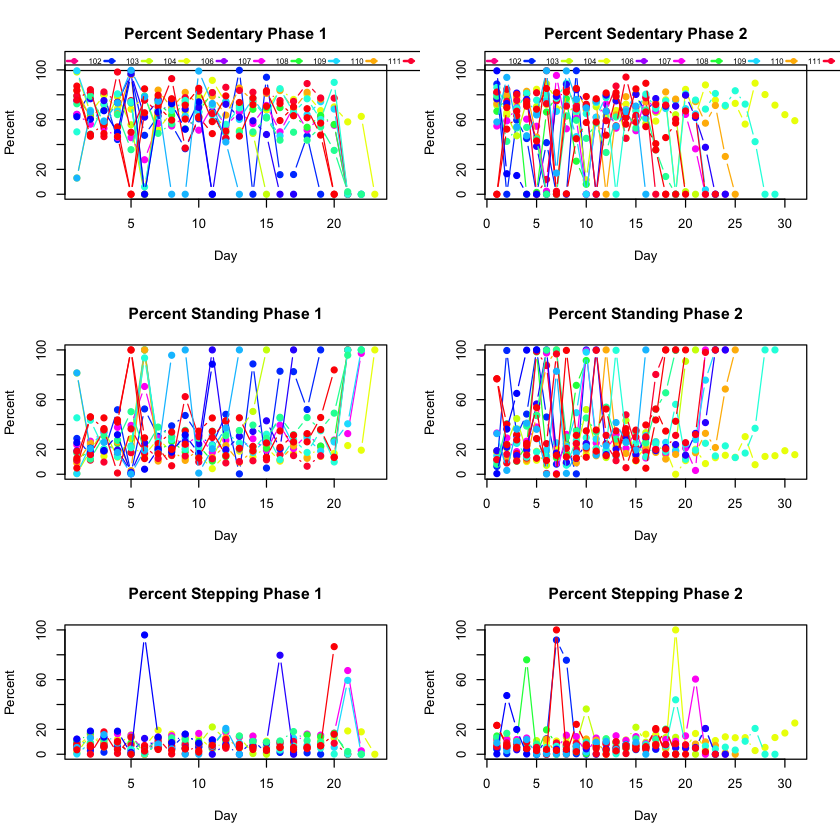

In [5]:
all_subjects = unique(shiny_data_v2[,"ID"]) # Save the subject IDs

# Set plot layout
par(mfcol=c(3,2), xpd=T)

# Plotting Code
# Phase 1
# sedentary
plot(NA, type="b", col="red",xlab="Day",xlim=c(1,23), ylab="Percent", main="Percent Sedentary Phase 1", ylim=c(0,100))
legend("topleft", legend=all_subjects, inset=c(0,-.1), col=cols_v2, horiz=T,cex=.6, lty=2, lwd=2, pch=19)
for(i in all_subjects){
  lines(shiny_data[which(shiny_data[,"ID"] == i),"percent_0"], type="b",col=cols_v2[i], pch=19)
}
# standing
plot(NA, type="b", col="red",xlab="Day",xlim=c(1,23), ylab="Percent", main="Percent Standing Phase 1", ylim=c(0,100))
for(i in all_subjects){
  lines(shiny_data[which(shiny_data[,"ID"] %in% i),"percent_1"], type="b",col=cols_v2[i],pch=19)    
}
# stepping
plot(NA, type="b", col="red",xlab="Day",xlim=c(1,23), ylab="Percent", main="Percent Stepping Phase 1", ylim=c(0,100))
for(i in all_subjects){
  lines(shiny_data[which(shiny_data[,"ID"] %in% i),"percent_2"], type="b",col=cols_v2[i],pch=19)      
}

# Phase 2
# sedentary
plot(NA, type="b", col="red",xlab="Day",xlim=c(1,31), ylab="Percent", main="Percent Sedentary Phase 2", ylim=c(0,100))
legend("topleft", legend=all_subjects, inset=c(0,-.1), col=cols_v2, horiz=T,cex=.6, lty=2, lwd=2, pch=19)
for(i in all_subjects){
  lines(shiny_data_v2[which(shiny_data_v2[,"ID"] == i),"percent_0"], type="b",col=cols_v2[i], pch=19)
}
# standing
plot(NA, type="b", col="red",xlab="Day",xlim=c(1,31), ylab="Percent", main="Percent Standing Phase 2", ylim=c(0,100))
for(i in all_subjects){
  lines(shiny_data_v2[which(shiny_data_v2[,"ID"] %in% i),"percent_1"], type="b",col=cols_v2[i],pch=19)    
}
# stepping
plot(NA, type="b", col="red",xlab="Day",xlim=c(1,31), ylab="Percent", main="Percent Stepping Phase 2", ylim=c(0,100))
for(i in all_subjects){
  lines(shiny_data_v2[which(shiny_data_v2[,"ID"] %in% i),"percent_2"], type="b",col=cols_v2[i],pch=19)
}

Sourcing these scripts will save the combined Phase 1 and 2 data, prompt data (time to action for each prompt across subjects), and data used for the Shiny app.
    
The app can be launched here:    
http://church.ohsu.edu:3838/choonoo/Stand_and_Move_at_Work/    
    
You can also run the Shiny app through R with your data.

In [ ]:
install.packages("shiny")
library(shiny)
runApp("/ASU Project/Data_OHSU") # change to the directory containing the ui.R, server.R, and shiny_data_v2.rda